In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
train=pd.read_csv("C:\\Users\\santhosh_aluvala\\PycharmProjects\\First_Learning_Proj\\loan-approval-prediction\\train_u6lujuX_CVtuZ9i.csv")
test=pd.read_csv("C:\\Users\\santhosh_aluvala\\PycharmProjects\\First_Learning_Proj\\loan-approval-prediction\\test_Y3wMUE5_7gLdaTN.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


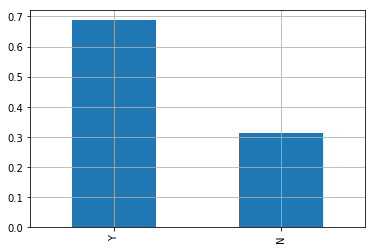

In [11]:
train['Loan_Status'].value_counts(normalize=True).plot.bar(grid=True)

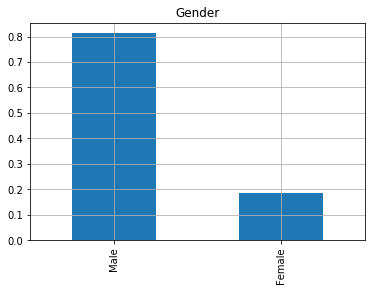

In [14]:
train['Gender'].value_counts(normalize=True).plot.bar(grid=True,title='Gender')

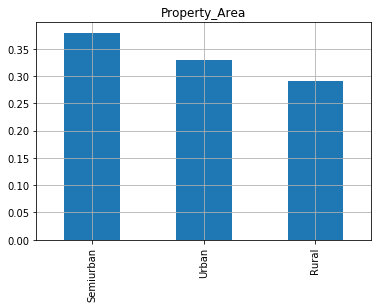

In [15]:
train['Property_Area'].value_counts(normalize=True).plot.bar(grid=True,title='Property_Area')

In [5]:
import seaborn as sns

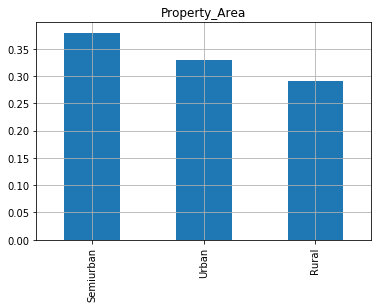

In [6]:
train['Property_Area'].value_counts(normalize=True).plot.bar(grid=True,title='Property_Area')

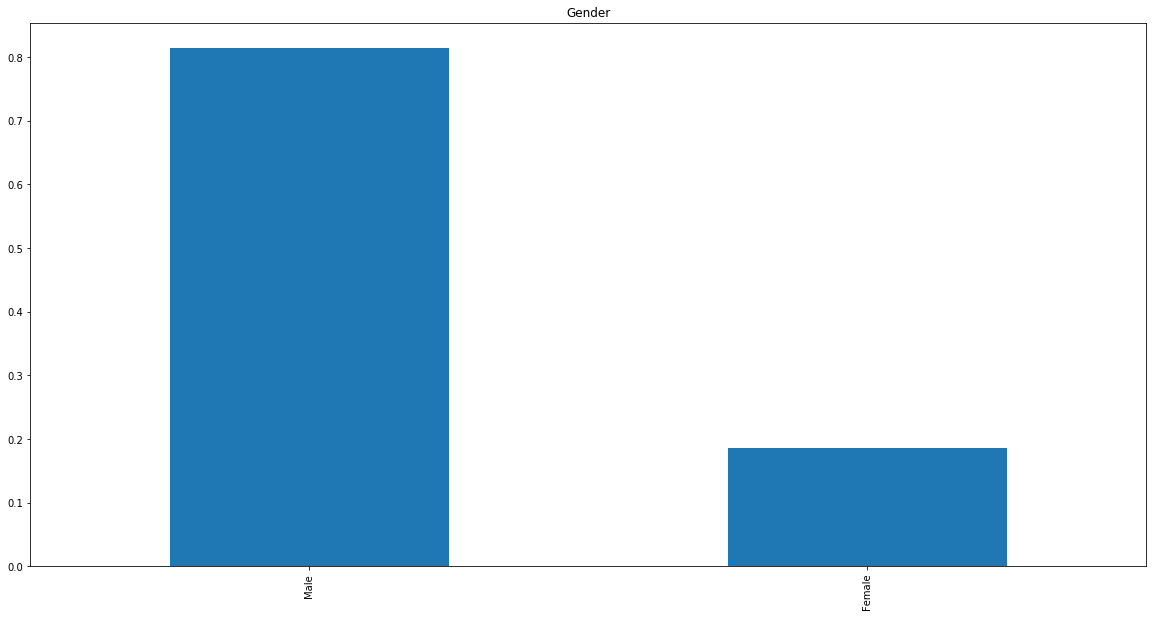

In [7]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.show()

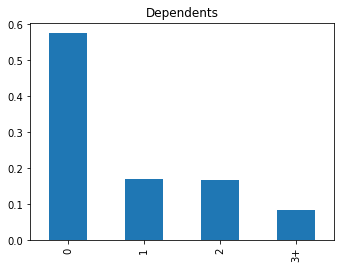

In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

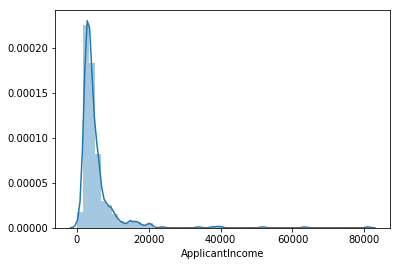

In [9]:
sns.distplot(train['ApplicantIncome'])

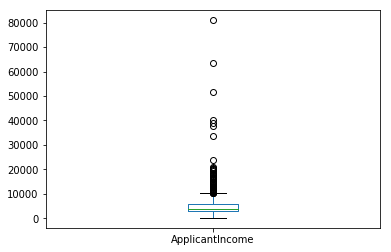

In [25]:
train['ApplicantIncome'].plot.box()

Text(0.5, 0.98, '')

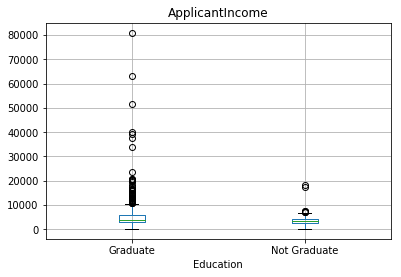

In [29]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

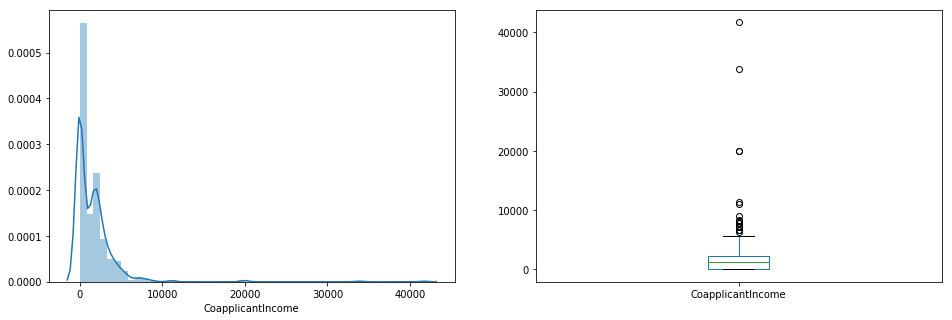

In [10]:
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [52]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
def bar_chart(feature):
    ln_approved = train[train['Loan_Status']=='Y'][feature].value_counts(normalize=True)
    ln_not_approved = train[train['Loan_Status']=='N'][feature].value_counts(normalize=True)
    df = pd.DataFrame([ln_approved,ln_not_approved])
    df.index = ['ln_approved','ln_not_approved']
    df.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

In [12]:
k=train[train['Loan_Status']=='Y']['ApplicantIncome'].mean()
#g=train[train['Loan_Status']=='N']['ApplicantIncome'].value_counts()
k

5384.068720379147

In [101]:
train[train['ApplicantIncome']>1000]==True

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,False,False,False,False,False,False,False,False,True,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,True,False,False
9,False,False,False,False,False,False,False,False,False,False,True,False,False


In [28]:
def BarChart(feature):
    loan_approved=train[train['Loan_Status']=='Y'][feature].value_counts()
    loan_not_approved=train[train['Loan_Status']=='N'][feature].value_counts()
    df6=pd.DataFrame([loan_approved,loan_not_approved])
    df6.index=['loan_approved','loan_not_approved']
    df6.plot(kind='bar',stacked=True)

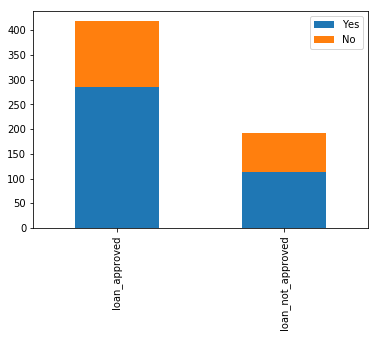

In [14]:
BarChart('Married')

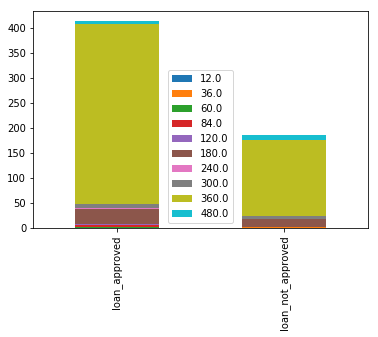

In [43]:
BarChart('Loan_Amount_Term')

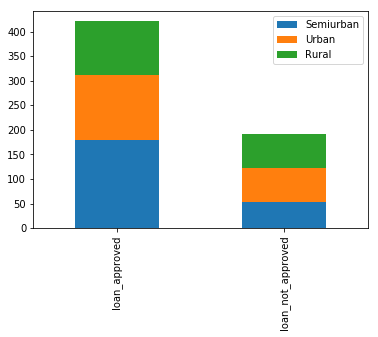

In [44]:
BarChart('Property_Area')

In [30]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

In [16]:
df=train.dropna()

In [23]:
train.Coapplicant_Income_bin

0          NaN
1      Average
2          NaN
3      Average
4          NaN
5         High
6      Average
7      Average
8      Average
9         High
10         Low
11         NaN
12        High
13     Average
14     Average
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21        High
22     Average
23         NaN
24         NaN
25         NaN
26     Average
27     Average
28         NaN
29         NaN
        ...   
584    Average
585    Average
586    Average
587        NaN
588        NaN
589        NaN
590       High
591        NaN
592        NaN
593       High
594        NaN
595        NaN
596        Low
597        NaN
598        NaN
599        NaN
600        NaN
601        NaN
602        NaN
603       High
604        NaN
605        NaN
606    Average
607    Average
608    Average
609        NaN
610        NaN
611        Low
612        NaN
613        NaN
Name: Coapplicant_Income_bin, Length: 614, dtype: category
Categories (3, object): [L

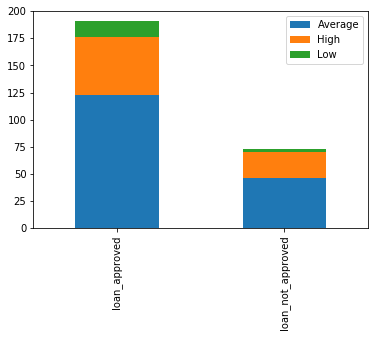

In [34]:
BarChart('Coapplicant_Income_bin')

In [44]:
#Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float))
train.Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float))

NameError: name 'Coapplicant_Income_bin' is not defined

In [62]:
train['CoapplicantIncome_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=groups)

In [70]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,NaN
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Average
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,Average
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,High


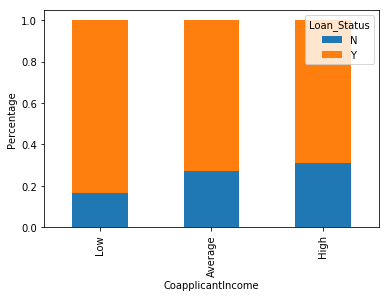

In [65]:
Coapplicant_Income_bin = pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [49]:
#Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float))
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [1]:
Coapplicant_Income_bin

NameError: name 'Coapplicant_Income_bin' is not defined